# Correlations of HyperParams-Pattern-length

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import json
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (20, 10)

## Preamble

In [3]:
datasets_path = Path("../data/hyperopt/datasets.csv")
hyperopt_res_path = Path("../results.anomaly.no_opt.json")
S2GPP = "mut:5000/akita/s2gpp"

## Read Datasets Overview

In [4]:
datasets = pd.read_csv(datasets_path)

## Read Hyperopt Results

In [5]:
with hyperopt_res_path.open("r") as f:
    results = json.load(f)

In [6]:
results_df = pd.DataFrame([(Path(k).parent.name + ".unsupervised", v["score"], *v["location"]) for k, v in results[S2GPP].items()], columns=["dataset_name", "score", "pattern-length", "latent", "query-length", "rate"])

## Join DataFrames

In [7]:
df = datasets.merge(results_df, left_on="dataset_name", right_on="dataset_name")

In [8]:
df.loc[:, "bo"] = df.dataset_name.apply(lambda x: x.split("-")[0])
df.loc[:, "atype"] = df.dataset_name.apply(lambda x: x.split("-")[1])

In [9]:
df.columns

Index(['collection_name', 'dataset_name', 'train_path', 'test_path',
       'dataset_type', 'datetime_index', 'split_at', 'train_type',
       'train_is_normal', 'input_type', 'length', 'dimensions',
       'contamination', 'num_anomalies', 'min_anomaly_length',
       'median_anomaly_length', 'max_anomaly_length', 'mean', 'stddev',
       'trend', 'stationarity', 'period_size', 'score', 'pattern-length',
       'latent', 'query-length', 'rate', 'bo', 'atype'],
      dtype='object')

## Find Correlations

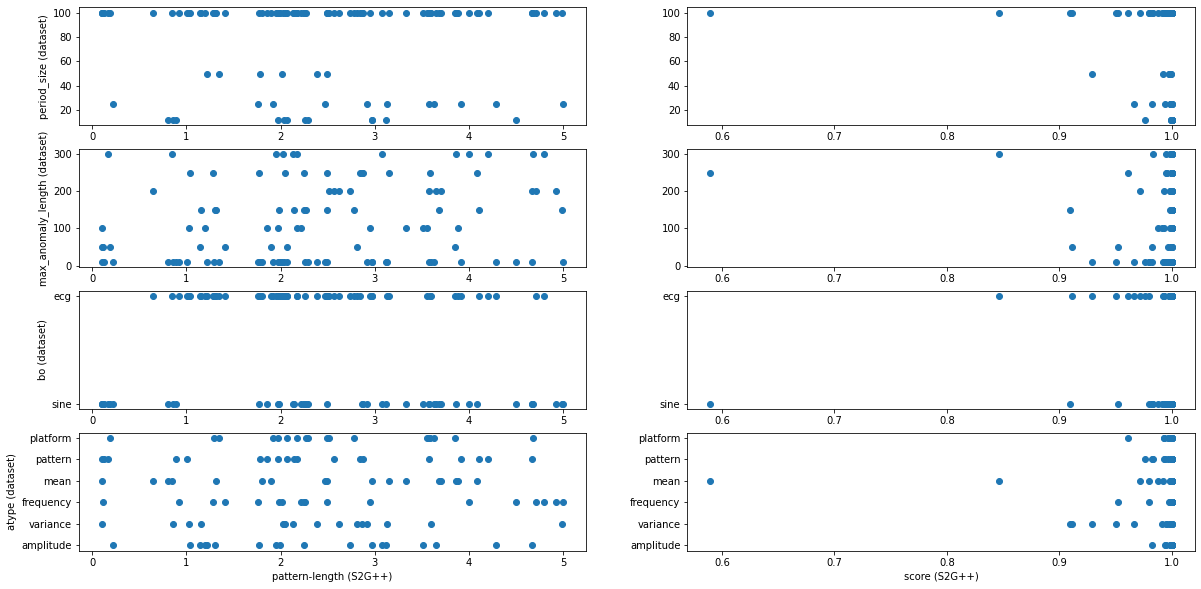

In [12]:
df_tmp = df[~df.score.isna()].copy()

xs = ["pattern-length", "score"]
ys = ["period_size", "max_anomaly_length", "bo", "atype"]

fig, axs = plt.subplots(len(ys), len(xs))

for r, row in enumerate(ys):
    for c, col in enumerate(xs):
        ax = axs[r, c]
        ax.scatter(y=df_tmp[row], x=df_tmp[col])
        if r == len(ys)-1:
            ax.set_xlabel(col + " (S2G++)")
        if c == 0:
            ax.set_ylabel(row + " (dataset)")
plt.show()

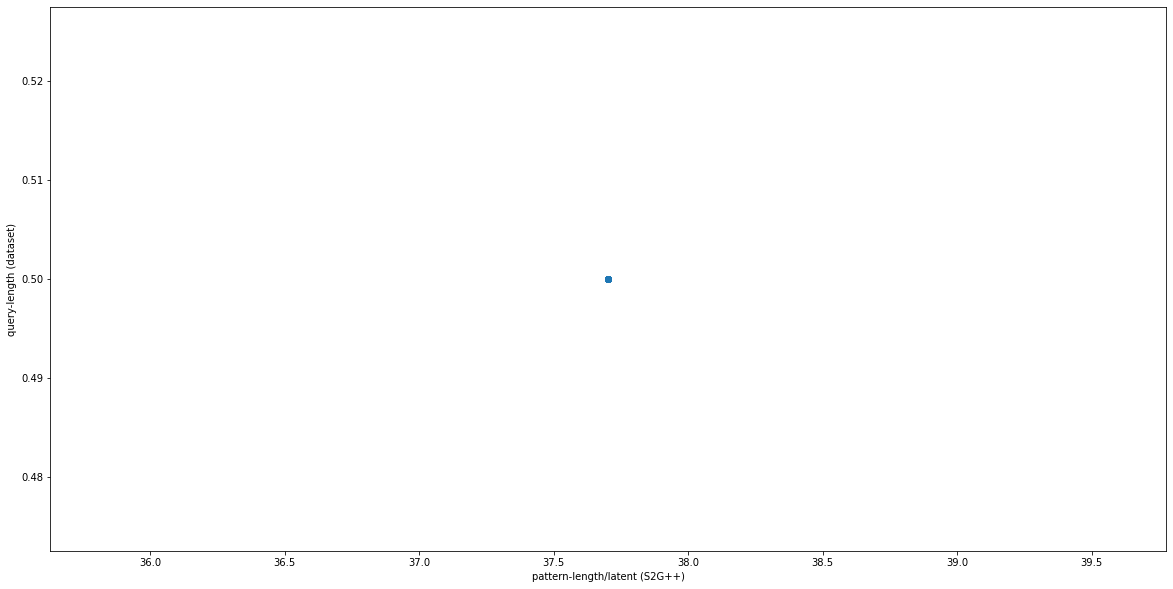

In [17]:
df_tmp = df[~df.score.isna()].copy()
df_tmp.loc[:, "pattern-length/latent"] = df_tmp["pattern-length"].astype(float) / df_tmp["latent"].astype(float)

xs = ["pattern-length/latent"]
ys = ["query-length"]

fig, axs = plt.subplots(len(ys), len(xs))

for r, row in enumerate(ys):
    for c, col in enumerate(xs):
        if len(ys) == 1 and len(xs) == 1:
            ax = axs
        elif len(ys) == 1 or len(xs) == 1:
            ax = axs[r+c]
        else:
            ax = axs[r, c]
        ax.scatter(y=df_tmp[row], x=df_tmp[col])
        if r == len(ys)-1:
            ax.set_xlabel(col + " (S2G++)")
        if c == 0:
            ax.set_ylabel(row + " (dataset)")
plt.show()

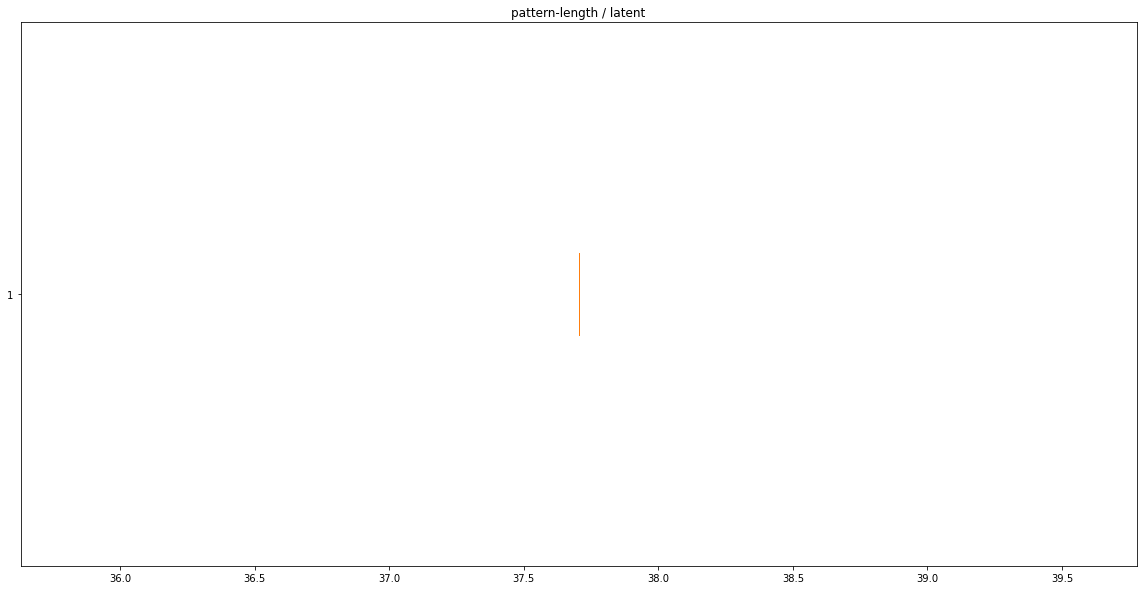

In [18]:
df_tmp = df[~df.score.isna()].copy()

a = "pattern-length"
b = "latent"

df_tmp.loc[:, f"{a}/{b}"] = df_tmp[a].astype(float) / df_tmp[b].astype(float)
plt.boxplot(df_tmp[f"{a}/{b}"], vert=False)
plt.title(f"{a} / {b}")
plt.show()

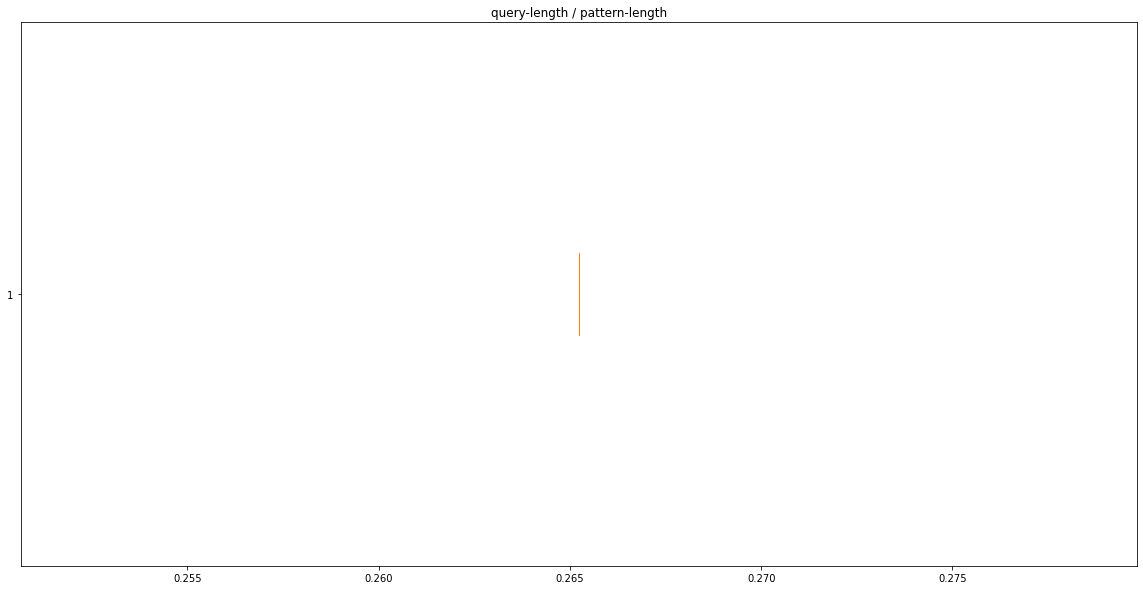

In [19]:
df_tmp = df[~df.score.isna()].copy()

a = "query-length"
b = "pattern-length"

df_tmp.loc[:, f"{a}/{b}"] = df_tmp[a].astype(float) / df_tmp[b].astype(float)
plt.boxplot(df_tmp[f"{a}/{b}"], vert=False)
plt.title(f"{a} / {b}")
plt.show()

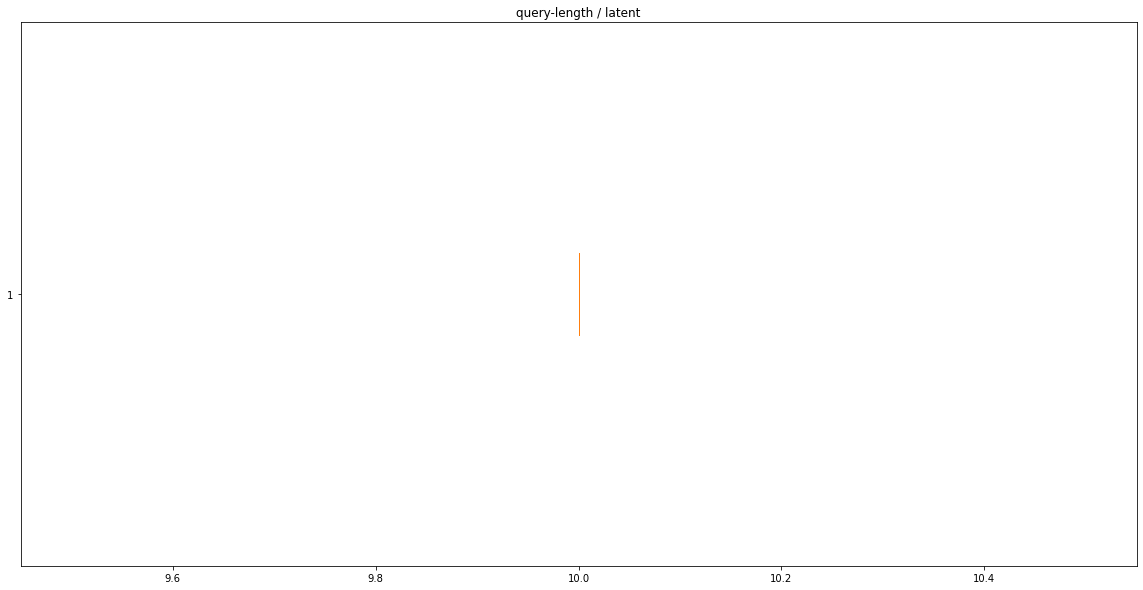

In [20]:
df_tmp = df[~df.score.isna()].copy()

a = "query-length"
b = "latent"

df_tmp.loc[:, f"{a}/{b}"] = df_tmp[a].astype(float) / df_tmp[b].astype(float)
plt.boxplot(df_tmp[f"{a}/{b}"], vert=False)
plt.title(f"{a} / {b}")
plt.show()

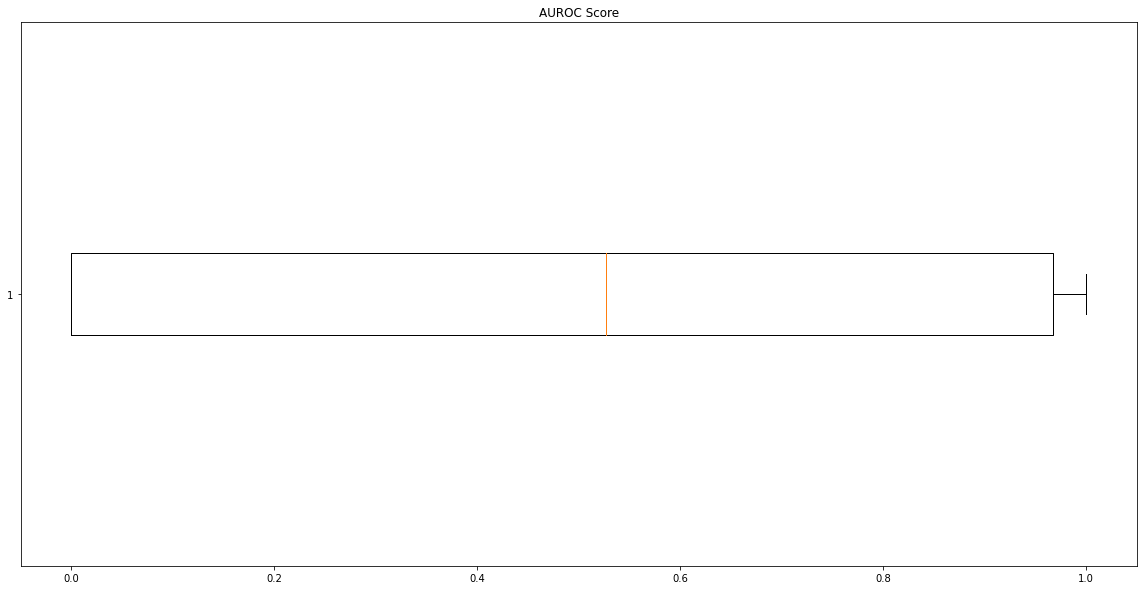

In [10]:
plt.boxplot(df[~df.score.isna()].score, vert=False)
plt.title("AUROC Score")
plt.show()

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

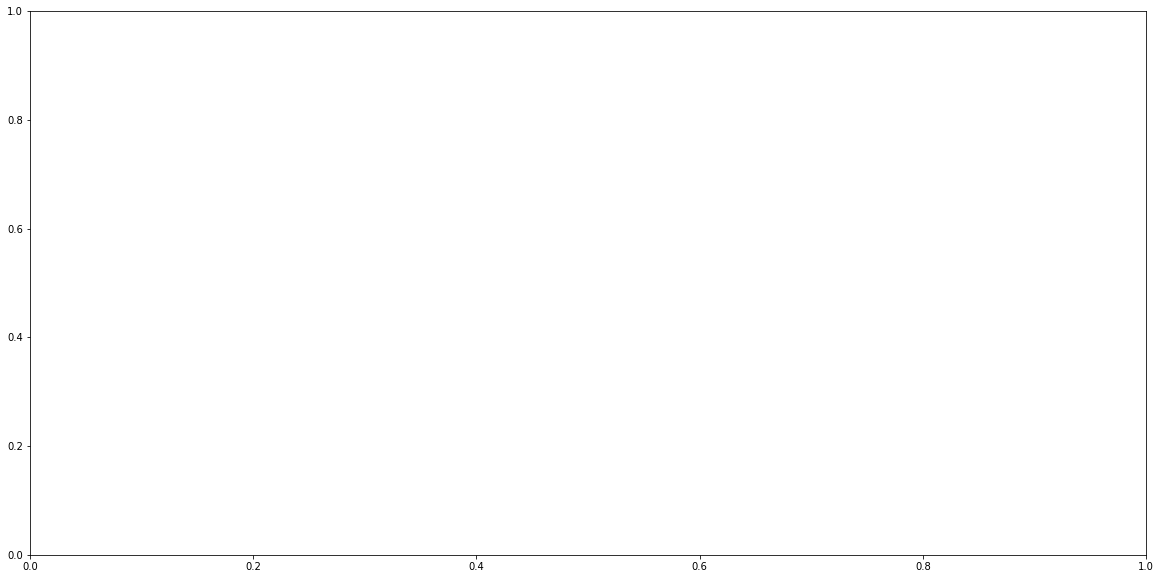

In [11]:
plt.boxplot(df[~df.score.isna()]["pattern-length"], vert=False)
plt.title("pattern-length = x * period-size")
plt.show()

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

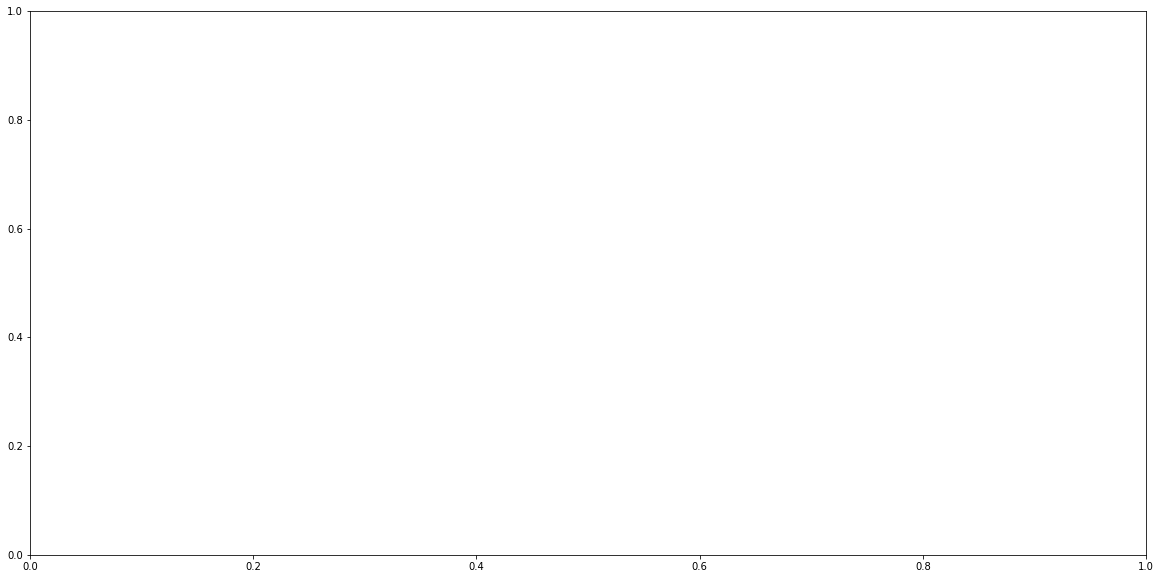

In [12]:
plt.boxplot(df[~df.score.isna()]["latent"], vert=False)
plt.title("latent = x * pattern-length")
plt.show()

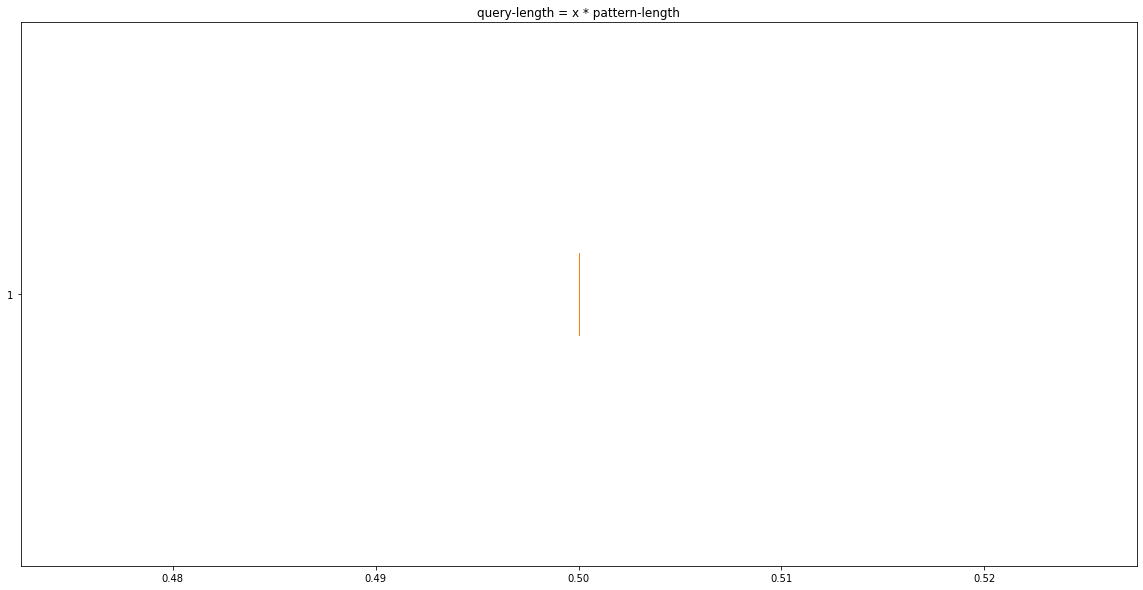

In [25]:
plt.boxplot(df[~df.score.isna()]["query-length"], vert=False)
plt.title("query-length = x * pattern-length")
plt.show()

# Exploration

In [15]:
dt

,collection_name,dataset_name,train_path,test_path,dataset_type,datetime_index,split_at,train_type,train_is_normal,input_type,...,trend,stationarity,period_size,score,pattern-length,latent,query-length,rate,bo,atype
0,GutenTAG,sine-amplitude-1-10.unsupervised,NaN,sine-amplitude-1-10/test.csv,synthetic,False,NaN,unsupervised,True,univariate,...,NaN,NaN,100.0,0.987237,pattern-length,latent,query-length,rate,sine,amplitude
1,GutenTAG,sine-amplitude-2-10.unsupervised,NaN,sine-amplitude-2-10/test.csv,synthetic,False,NaN,unsupervised,True,univariate,...,NaN,NaN,50.0,0.476537,pattern-length,latent,query-length,rate,sine,amplitude
2,GutenTAG,sine-amplitude-4-10.unsupervised,NaN,sine-amplitude-4-10/test.csv,synthetic,False,NaN,unsupervised,True,univariate,...,NaN,NaN,25.0,0.406406,pattern-length,latent,query-length,rate,sine,amplitude
3,GutenTAG,sine-amplitude-8-10.unsupervised,NaN,sine-amplitude-8-10/test.csv,synthetic,False,NaN,unsupervised,True,univariate,...,NaN,NaN,12.0,-0.000000,pattern-length,latent,query-length,rate,sine,amplitude
4,GutenTAG,sine-amplitude-1-50.unsupervised,NaN,sine-amplitude-1-50/test.csv,synthetic,False,NaN,unsupervised,True,univariate,...,NaN,NaN,100.0,-0.000000,pattern-length,latent,query-length,rate,sine,amplitude
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,GutenTAG,ecg-platform-1-100.unsupervised,NaN,ecg-platform-1-100/test.csv,synthetic,False,NaN,unsupervised,True,univariate,...,NaN,NaN,100.0,0.994048,pattern-length,latent,query-length,rate,ecg,platform
116,GutenTAG,ecg-platform-1-150.unsupervised,NaN,ecg-platform-1-150/test.csv,synthetic,False,NaN,unsupervised,True,univariate,...,NaN,NaN,100.0,0.500000,pattern-length,latent,query-length,rate,ecg,platform
117,GutenTAG,ecg-platform-1-200.unsupervised,NaN,ecg-platform-1-200/test.csv,synthetic,False,NaN,unsupervised,True,univariate,...,NaN,NaN,100.0,0.819442,pattern-length,latent,query-length,rate,ecg,platform
118,GutenTAG,ecg-platform-1-250.unsupervised,NaN,ecg-platform-1-250/test.csv,synthetic,False,NaN,unsupervised,True,univariate,...,NaN,NaN,100.0,0.992660,pattern-length,latent,query-length,rate,ecg,platform


In [13]:
dt = df[(~df.score.isna())]

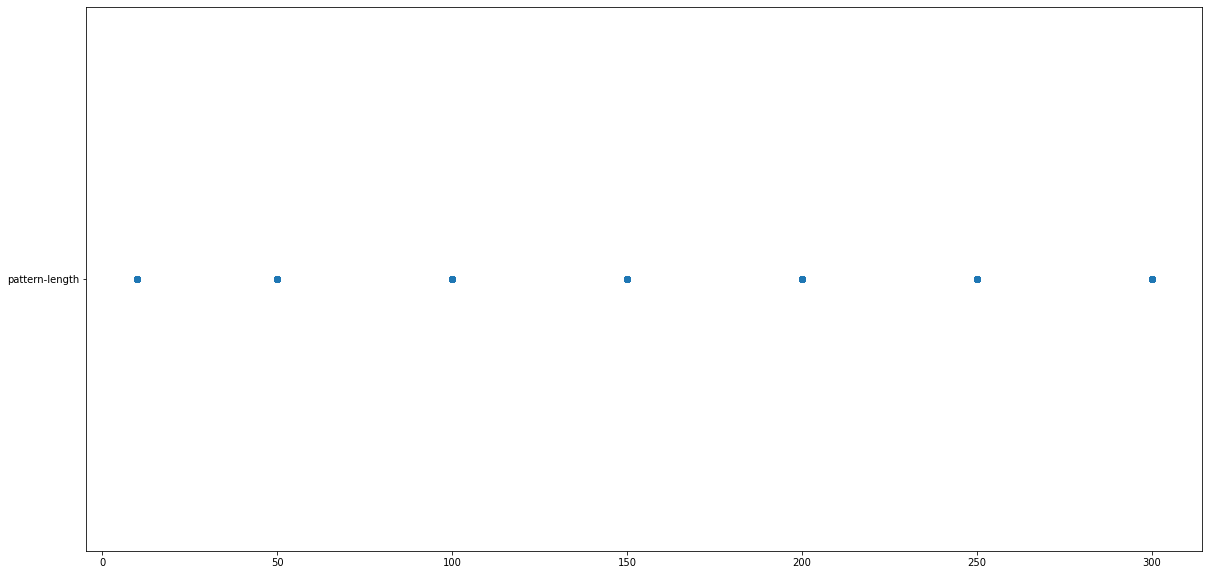

In [14]:
plt.scatter(x=dt["max_anomaly_length"], y=dt["pattern-length"])
plt.show()

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [31]:
pd.set_option("display.max_columns", None)

In [32]:
dt

,collection_name,dataset_name,train_path,test_path,dataset_type,datetime_index,split_at,train_type,train_is_normal,input_type,length,dimensions,contamination,num_anomalies,min_anomaly_length,median_anomaly_length,max_anomaly_length,mean,stddev,trend,stationarity,period_size,score,pattern-length,latent,query-length,rate,bo,atype
0,GutenTAG,sine-amplitude-1-10.unsupervised,NaN,sine-amplitude-1-10/test.csv,synthetic,False,NaN,unsupervised,True,univariate,10000,1,0.001,1,10,10.0,10,0.000133,0.0,NaN,NaN,100.0,0.993914,4.666292,0.3,1.5,100.0,sine,amplitude
2,GutenTAG,sine-amplitude-4-10.unsupervised,NaN,sine-amplitude-4-10/test.csv,synthetic,False,NaN,unsupervised,True,univariate,10000,1,0.001,1,10,10.0,10,0.000018,0.0,NaN,NaN,25.0,0.982953,0.221277,0.3,1.5,100.0,sine,amplitude
3,GutenTAG,sine-amplitude-8-10.unsupervised,NaN,sine-amplitude-8-10/test.csv,synthetic,False,NaN,unsupervised,True,univariate,10000,1,0.001,1,10,10.0,10,-0.000742,0.0,NaN,NaN,12.0,1.000000,3.119145,0.3,1.5,100.0,sine,amplitude
5,GutenTAG,sine-amplitude-1-100.unsupervised,NaN,sine-amplitude-1-100/test.csv,synthetic,False,NaN,unsupervised,True,univariate,10000,1,0.010,1,100,100.0,100,0.000098,0.0,NaN,NaN,100.0,0.999986,3.508575,0.3,1.5,100.0,sine,amplitude
6,GutenTAG,sine-amplitude-1-150.unsupervised,NaN,sine-amplitude-1-150/test.csv,synthetic,False,NaN,unsupervised,True,univariate,10000,1,0.015,1,150,150.0,150,0.001962,0.0,NaN,NaN,100.0,0.999950,2.247037,0.3,1.5,100.0,sine,amplitude
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,GutenTAG,ecg-platform-1-100.unsupervised,NaN,ecg-platform-1-100/test.csv,synthetic,False,NaN,unsupervised,True,univariate,10000,1,0.010,1,100,100.0,100,0.467638,0.0,NaN,NaN,100.0,0.993092,3.558115,0.3,1.5,100.0,ecg,platform
116,GutenTAG,ecg-platform-1-150.unsupervised,NaN,ecg-platform-1-150/test.csv,synthetic,False,NaN,unsupervised,True,univariate,10000,1,0.015,1,150,150.0,150,0.458415,0.0,NaN,NaN,100.0,0.999917,2.782444,0.3,1.5,100.0,ecg,platform
117,GutenTAG,ecg-platform-1-200.unsupervised,NaN,ecg-platform-1-200/test.csv,synthetic,False,NaN,unsupervised,True,univariate,10000,1,0.020,1,200,200.0,200,0.455592,0.0,NaN,NaN,100.0,0.999756,2.516879,0.3,1.5,100.0,ecg,platform
118,GutenTAG,ecg-platform-1-250.unsupervised,NaN,ecg-platform-1-250/test.csv,synthetic,False,NaN,unsupervised,True,univariate,10000,1,0.025,1,250,250.0,250,0.452959,0.0,NaN,NaN,100.0,0.961258,3.587840,0.3,1.5,100.0,ecg,platform


In [38]:
dt.loc[:, "bo_enc"] = LabelEncoder().fit_transform(dt["bo"])
dt.loc[:, "atype_enc"] = LabelEncoder().fit_transform(dt["atype"])

x = dt[["period_size", "contamination", "median_anomaly_length", "mean", "bo_enc", "atype_enc"]]
y = dt["pattern-length"]

/home/phillip/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [55]:
X_train, X_test, y_train, y_test = train_test_split(x,y)

In [74]:
rg = MLPRegressor(hidden_layer_sizes=(100, 100, 100), max_iter=2000).fit(X_train, y_train)

In [77]:
metrics.mean_absolute_error(rg.predict(X_test), y_test)

1.1689556210496397

In [52]:
from sklearn import metrics, datasets, ensemble
from sklearn.tree import _tree

#Decision Rules to code utility
def dtree_to_code(tree, feature_names, tree_idx):
        """
        Decision tree rules in the form of Code.
        """
        tree_ = tree.tree_
        feature_name = [
            feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
            for i in tree_.feature
        ]
        print('def tree_{1}({0}):'.format(", ".join(feature_names),tree_idx))

        def recurse(node, depth):
            indent = "  " * depth
            if tree_.feature[node] != _tree.TREE_UNDEFINED:
                name = feature_name[node]
                threshold = tree_.threshold[node]
                print ('{0}if {1} <= {2}:'.format(indent, name, threshold))
                recurse(tree_.children_left[node], depth + 1)
                print ('{0}else:  # if {1} > {2}'.format(indent, name, threshold))
                recurse(tree_.children_right[node], depth + 1)
            else:
                print ('{0}return {1}'.format(indent, tree_.value[node]))
        recurse(0, 1)
def rf_to_code(rf,feature_names):
    """
    Conversion of Random forest Decision rules to code.
    """
    for base_learner_id, base_learner in enumerate(rf.estimators_):
        dtree_to_code(tree = base_learner,feature_names=feature_names,tree_idx=base_learner_id)

In [53]:
rf_to_code(rg, x.columns)

def tree_0(period_size, contamination, median_anomaly_length, mean, bo_enc, atype_enc):
  if mean <= 0.4630863666534424:
    if period_size <= 18.5:
      if mean <= 0.00018294612101499297:
        return [[0.89125885]]
      else:  # if mean > 0.00018294612101499297
        return [[0.85913896]]
    else:  # if period_size > 18.5
      if mean <= -0.0022243639396037906:
        if contamination <= 0.009999999776482582:
          return [[0.11609709]]
        else:  # if contamination > 0.009999999776482582
          if mean <= -0.00380735844373703:
            return [[1.98438446]]
          else:  # if mean > -0.00380735844373703
            return [[2.24392365]]
      else:  # if mean > -0.0022243639396037906
        if mean <= -0.0006297764193732291:
          if mean <= -0.0006816182867623866:
            if atype_enc <= 3.5:
              return [[1.85460119]]
            else:  # if atype_enc > 3.5
              if period_size <= 62.5:
                return [[3.62518424]]
     

                if mean <= 0.008413462754106149:
                  return [[4.92740243]]
                else:  # if mean > 0.008413462754106149
                  if median_anomaly_length <= 225.0:
                    if contamination <= 0.01749999960884452:
                      return [[3.68701832]]
                    else:  # if contamination > 0.01749999960884452
                      return [[3.70311718]]
                  else:  # if median_anomaly_length > 225.0
                    if median_anomaly_length <= 275.0:
                      return [[4.0862665]]
                    else:  # if median_anomaly_length > 275.0
                      return [[3.86602367]]
            else:  # if atype_enc > 2.5
              if contamination <= 0.027499999850988388:
                if median_anomaly_length <= 225.0:
                  if mean <= 0.22839819424552843:
                    return [[2.14470525]]
                  else:  # if mean > 0.22839819424552843
                    if co

                    return [[2.17014675]]
          else:  # if mean > 0.46793490648269653
            if atype_enc <= 2.0:
              return [[4.79746528]]
            else:  # if atype_enc > 2.0
              return [[4.10722103]]
        else:  # if atype_enc > 4.5
          return [[2.04366352]]
  else:  # if mean > 0.47208625078201294
    if mean <= 0.4871538281440735:
      if mean <= 0.4793091416358948:
        if mean <= 0.47353897988796234:
          if atype_enc <= 2.5:
            return [[0.91572169]]
          else:  # if atype_enc > 2.5
            return [[1.29395146]]
        else:  # if mean > 0.47353897988796234
          if mean <= 0.4742446690797806:
            return [[1.99675601]]
          else:  # if mean > 0.4742446690797806
            if contamination <= 0.02000000001862645:
              if mean <= 0.4758027195930481:
                if contamination <= 0.007999999856110662:
                  return [[1.34475795]]
                else:  # if contaminatio

            if mean <= 0.000128336595764722:
              return [[0.89125885]]
            else:  # if mean > 0.000128336595764722
              if atype_enc <= 1.5:
                return [[1.76462198]]
              else:  # if atype_enc > 1.5
                if mean <= 0.4709128737449646:
                  if atype_enc <= 4.0:
                    if mean <= 0.23530300403945148:
                      return [[3.57212178]]
                    else:  # if mean > 0.23530300403945148
                      return [[3.92093441]]
                  else:  # if atype_enc > 4.0
                    return [[3.12613781]]
                else:  # if mean > 0.4709128737449646
                  if atype_enc <= 3.0:
                    if mean <= 0.472213476896286:
                      return [[2.96960331]]
                    else:  # if mean > 0.472213476896286
                      return [[2.4761709]]
                  else:  # if atype_enc > 3.0
                    if mean <= 0.4730827957391

                  return [[2.29605554]]
                else:  # if period_size > 18.5
                  return [[2.91642387]]
              else:  # if period_size > 62.5
                if atype_enc <= 1.5:
                  return [[1.7679665]]
                else:  # if atype_enc > 1.5
                  if mean <= -0.00032166603341465816:
                    return [[0.12139135]]
                  else:  # if mean > -0.00032166603341465816
                    return [[0.1]]
          else:  # if mean > -0.00015598057507304475
            if atype_enc <= 1.5:
              if contamination <= 0.005499999911990017:
                if atype_enc <= 0.5:
                  return [[4.2934908]]
                else:  # if atype_enc > 0.5
                  if period_size <= 18.5:
                    return [[4.50420438]]
                  else:  # if period_size > 18.5
                    return [[5.]]
              else:  # if contamination > 0.005499999911990017
                if mean 

                        return [[2.94856773]]
                      else:  # if mean > 0.46744561195373535
                        return [[3.55811496]]
                    else:  # if contamination > 0.014999999664723873
                      return [[4.71432384]]
                  else:  # if mean > 0.46925094723701477
                    if mean <= 0.47905781865119934:
                      if atype_enc <= 2.5:
                        return [[1.31005933]]
                      else:  # if atype_enc > 2.5
                        if contamination <= 0.017500000074505806:
                          return [[2.17128335]]
                        else:  # if contamination > 0.017500000074505806
                          return [[2.83908042]]
                    else:  # if mean > 0.47905781865119934
                      return [[3.88695395]]
            else:  # if mean > 0.4861115366220474
              return [[0.64836356]]
          else:  # if atype_enc > 4.5
            if median_an

                if atype_enc <= 1.5:
                  return [[4.79746528]]
                else:  # if atype_enc > 1.5
                  if bo_enc <= 0.5:
                    return [[4.20737493]]
                  else:  # if bo_enc > 0.5
                    return [[3.86602367]]
            else:  # if atype_enc > 3.5
              if median_anomaly_length <= 125.0:
                if mean <= 0.47139841318130493:
                  if contamination <= 0.005499999911990017:
                    return [[3.60279261]]
                  else:  # if contamination > 0.005499999911990017
                    return [[3.55811496]]
                else:  # if mean > 0.47139841318130493
                  return [[1.29395146]]
              else:  # if median_anomaly_length > 125.0
                if median_anomaly_length <= 175.0:
                  return [[1.15557142]]
                else:  # if median_anomaly_length > 175.0
                  if contamination <= 0.022499999962747097:
        

                if contamination <= 0.009999999776482582:
                  if atype_enc <= 0.5:
                    return [[0.22127684]]
                  else:  # if atype_enc > 0.5
                    if atype_enc <= 2.0:
                      return [[0.11609709]]
                    else:  # if atype_enc > 2.0
                      return [[0.1]]
                else:  # if contamination > 0.009999999776482582
                  return [[1.98438446]]
              else:  # if atype_enc > 3.5
                if mean <= -0.00272073142696172:
                  return [[0.18560736]]
                else:  # if mean > -0.00272073142696172
                  if contamination <= 0.007999999856110662:
                    return [[3.62518424]]
                  else:  # if contamination > 0.007999999856110662
                    return [[2.26620879]]
            else:  # if mean > 5.803248677693773e-05
              if contamination <= 0.012499999720603228:
                if mean <= 0.0001

              if mean <= 3.863765414280351e-06:
                return [[0.1]]
              else:  # if mean > 3.863765414280351e-06
                return [[0.22127684]]
        else:  # if mean > 7.554897638328839e-05
          if mean <= 0.00019507069373503327:
            return [[4.66629153]]
          else:  # if mean > 0.00019507069373503327
            return [[3.57212178]]
      else:  # if mean > 0.00030076106486376375
        if bo_enc <= 0.5:
          if atype_enc <= 4.5:
            if period_size <= 37.5:
              if mean <= 0.4719623625278473:
                if period_size <= 18.5:
                  return [[2.25630509]]
                else:  # if period_size > 18.5
                  if mean <= 0.4683268517255783:
                    return [[1.76462198]]
                  else:  # if mean > 0.4683268517255783
                    return [[1.91438605]]
              else:  # if mean > 0.4719623625278473
                if atype_enc <= 1.0:
                  retur

In [15]:
import seaborn as sns

<AxesSubplot:xlabel='score', ylabel='Count'>

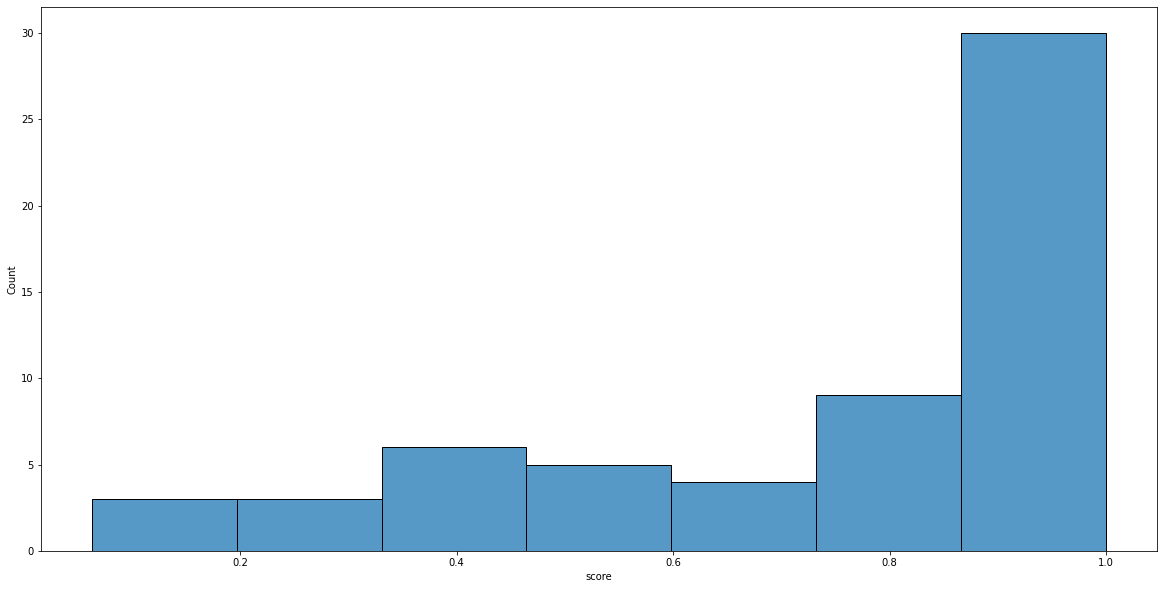

In [16]:
sns.histplot(data=df, x="score")